In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:

df_eda = pd.read_csv(r"C:\Users\bagul\Documents\GitHub\Capstone-3\df_clean.csv")

In [3]:
df_eda.head()

Unnamed: 0  customer_id  call_failure  complaints  subscription_length  \
0           0            0             8           0                   38   
1           1            1             0           0                   39   
2           2            2            10           0                   37   
3           3            3            10           0                   38   
4           4            4             3           0                   38   

   charge_amount  seconds_of_use  frequency_of_use  frequency_of_sms  \
0              0            4370                71                 5   
1              0             318                 5                 7   
2              0            2453                60               359   
3              0            4198                66                 1   
4              0            2393                58                 2   

   distinct_called_numbers  age_group    tariff_plan      status  age  \
0                       17          3  Pay as you go      active   30   
1                        4          2  Pay as you go  non-active   25   
2                       24          3  Pay as you go      active   30   
3                       35          1  Pay as you go      active   15   
4                       33          1  Pay as you go      active   15   

   customer_value  churn  
0         197.640  False  
1          46.035  False  
2        1536.520  False  
3         240.020  False  
4         145.805  False

In [4]:
df_eda.describe(include = ('object','bool'))
            

tariff_plan  status  churn
count            3150    3150   3150
unique              2       2      2
top     Pay as you go  active  False
freq             2905    2368   2655

In [5]:
df_eda.describe(include = 'number')

Unnamed: 0  customer_id  call_failure   complaints  \
count    3150.000     3150.000   3150.000000  3150.000000   
mean     1574.500     1574.500      7.627937     0.076508   
std       909.471      909.471      7.263886     0.265851   
min         0.000        0.000      0.000000     0.000000   
25%       787.250      787.250      1.000000     0.000000   
50%      1574.500     1574.500      6.000000     0.000000   
75%      2361.750     2361.750     12.000000     0.000000   
max      3149.000     3149.000     36.000000     1.000000   

       subscription_length  charge_amount  seconds_of_use  frequency_of_use  \
count          3150.000000    3150.000000     3150.000000       3150.000000   
mean             32.541905       0.942857     4472.459683         69.460635   
std               8.573482       1.521072     4197.908687         57.413308   
min               3.000000       0.000000        0.000000          0.000000   
25%              30.000000       0.000000     1391.250000         27.000000   
50%              35.000000       0.000000     2990.000000         54.000000   
75%              38.000000       1.000000     6478.250000         95.000000   
max              47.000000      10.000000    17090.000000        255.000000   

       frequency_of_sms  distinct_called_numbers    age_group          age  \
count       3150.000000              3150.000000  3150.000000  3150.000000   
mean          73.174921                23.509841     2.826032    30.998413   
std          112.237560                17.217337     0.892555     8.831095   
min            0.000000                 0.000000     1.000000    15.000000   
25%            6.000000                10.000000     2.000000    25.000000   
50%           21.000000                21.000000     3.000000    30.000000   
75%           87.000000                34.000000     3.000000    30.000000   
max          522.000000                97.000000     5.000000    55.000000   

       customer_value  
count     3150.000000  
mean       470.972916  
std        517.015433  
min          0.000000  
25%        113.801250  
50%        228.480000  
75%        788.388750  
max       2165.280000

In [6]:
#Quick check for dtypes
df_eda.dtypes

Unnamed: 0                   int64
customer_id                  int64
call_failure                 int64
complaints                   int64
subscription_length          int64
charge_amount                int64
seconds_of_use               int64
frequency_of_use             int64
frequency_of_sms             int64
distinct_called_numbers      int64
age_group                    int64
tariff_plan                 object
status                      object
age                          int64
customer_value             float64
churn                         bool
dtype: object

In [7]:
#Quick check for nulls
df_eda.isnull().sum()

Unnamed: 0                 0
customer_id                0
call_failure               0
complaints                 0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
churn                      0
dtype: int64

In [8]:
#Dropping the unnamed column and will make sure to save as pickle/parquet format to avoid reverting back.
df_eda = df_eda.drop(['Unnamed: 0'], axis= 1)

In [9]:
df_eda.head()

customer_id  call_failure  complaints  subscription_length  charge_amount  \
0            0             8           0                   38              0   
1            1             0           0                   39              0   
2            2            10           0                   37              0   
3            3            10           0                   38              0   
4            4             3           0                   38              0   

   seconds_of_use  frequency_of_use  frequency_of_sms  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   distinct_called_numbers  age_group    tariff_plan      status  age  \
0                       17          3  Pay as you go      active   30   
1                        4          2  Pay as you go  non-active   25   
2                       24          3  Pay as you go      active   30   
3                       35          1  Pay as you go      active   15   
4                       33          1  Pay as you go      active   15   

   customer_value  churn  
0         197.640  False  
1          46.035  False  
2        1536.520  False  
3         240.020  False  
4         145.805  False

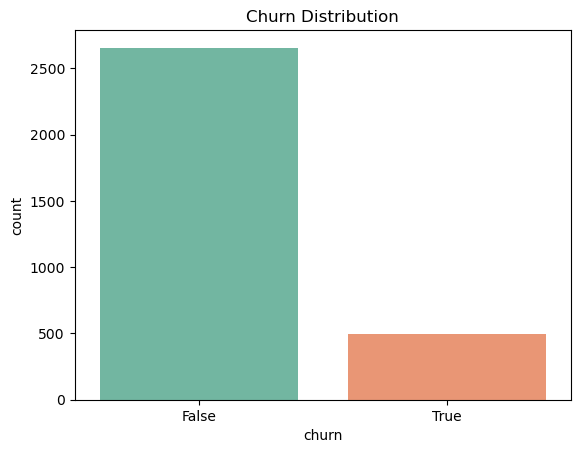

In [10]:
#Creating a countplot for churn column
sns.countplot(x='churn',data=df_eda,hue='churn',palette ='Set2',legend=False)
plt.title('Churn Distribution')
plt.show()

In [11]:
#Quick check of the churn_rate 
churn_rate = df_eda['churn'].value_counts(normalize=True) * 100
print(churn_rate)

churn
False    84.285714
True     15.714286
Name: proportion, dtype: float64


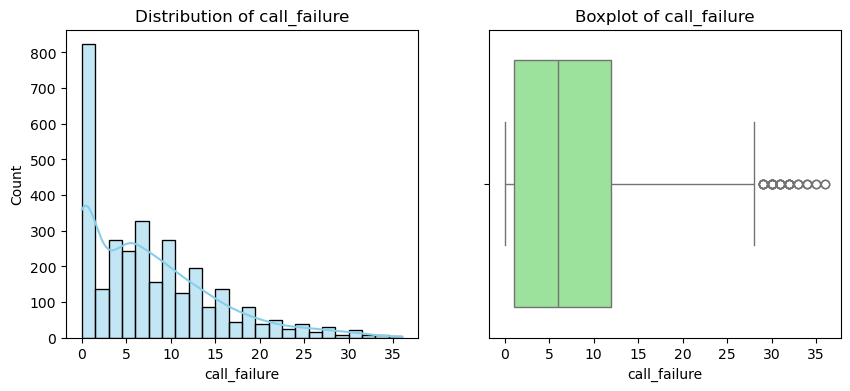

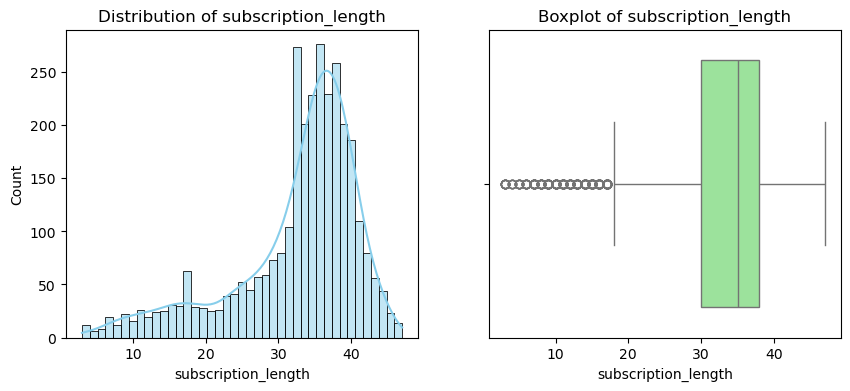

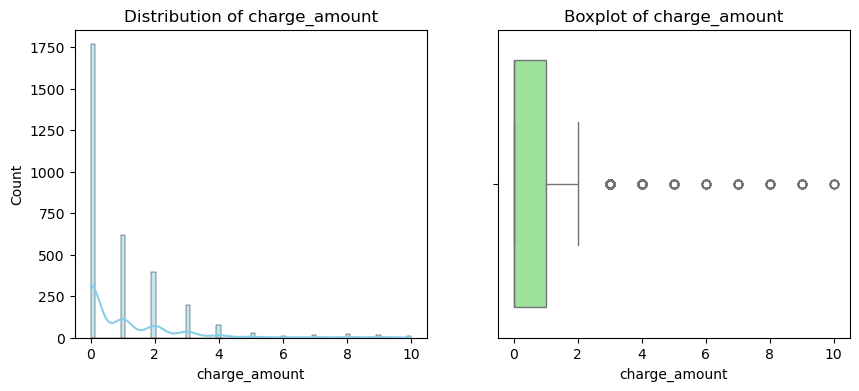

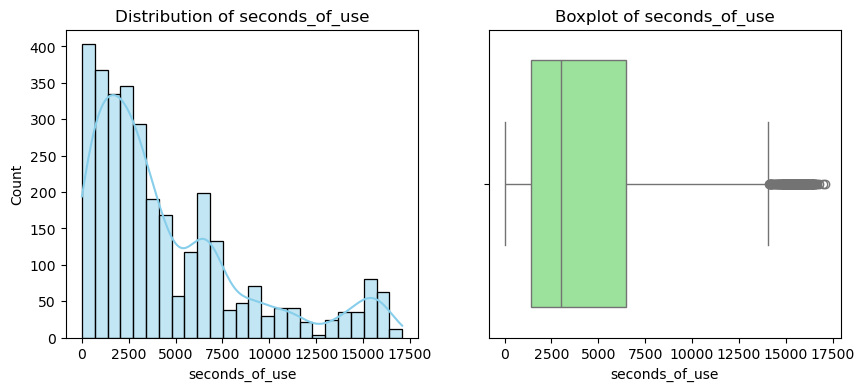

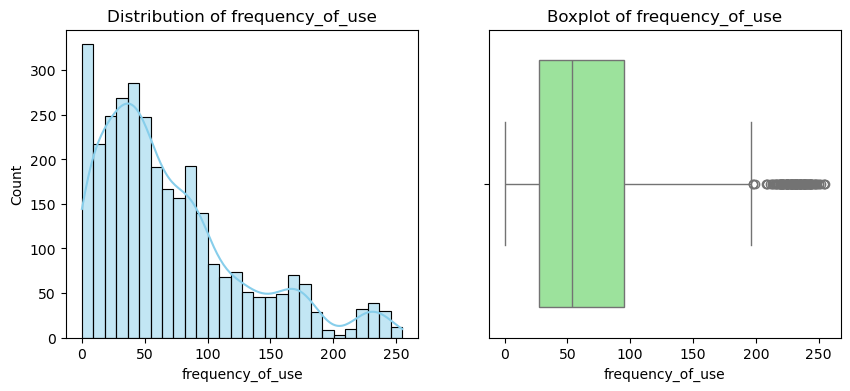

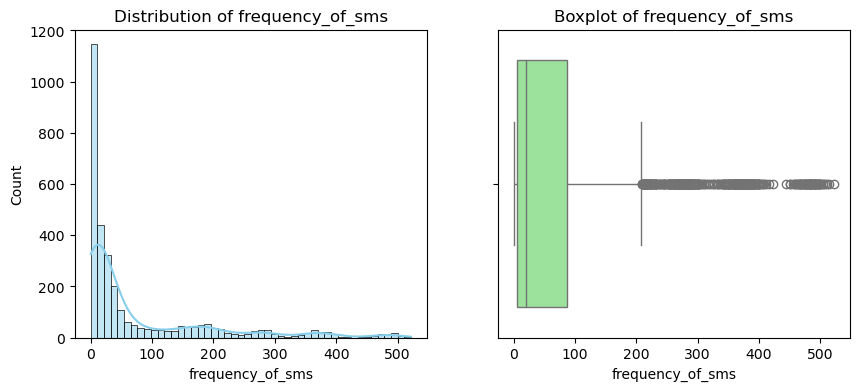

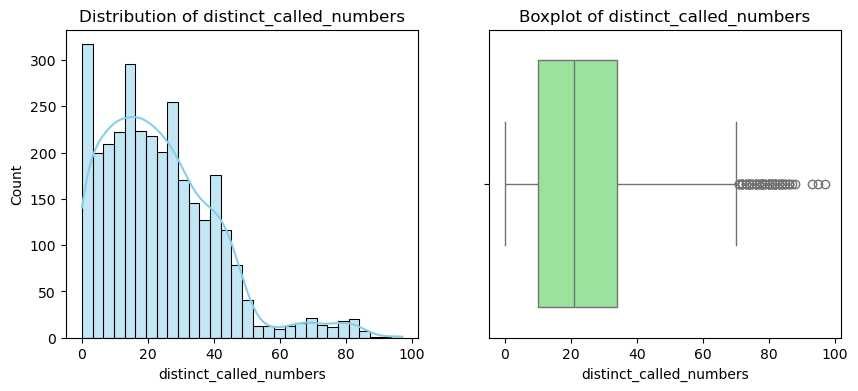

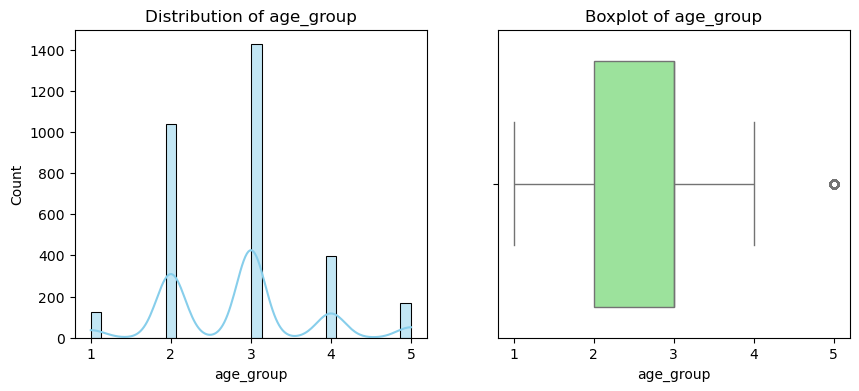

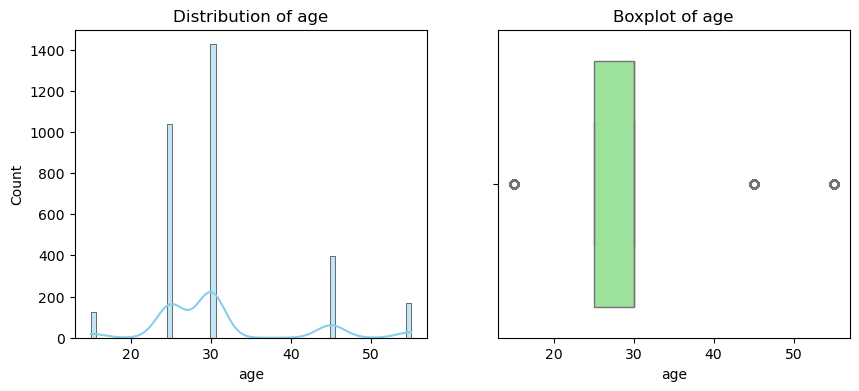

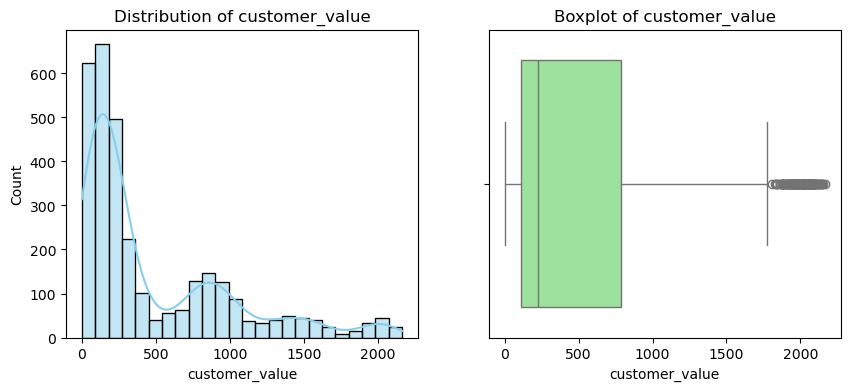

In [12]:
#Plotting histograms + boxplots to understand distributions & outliers
#Plotting complaints seperately since its either 1s or 0s
num_cols = df_eda.select_dtypes(include=['int64','float64']).columns.drop(['customer_id','complaints'])

for col in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df_eda[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")


    plt.subplot(1,2,2)
    sns.boxplot(x=df_eda[col], color ='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.show()

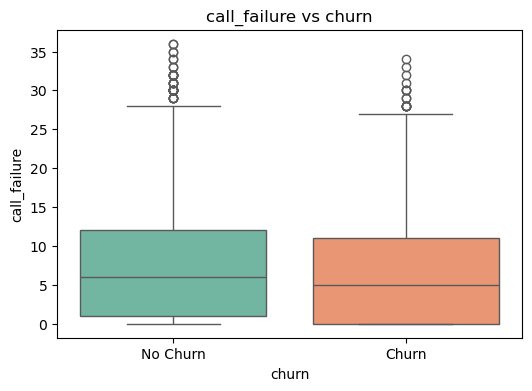

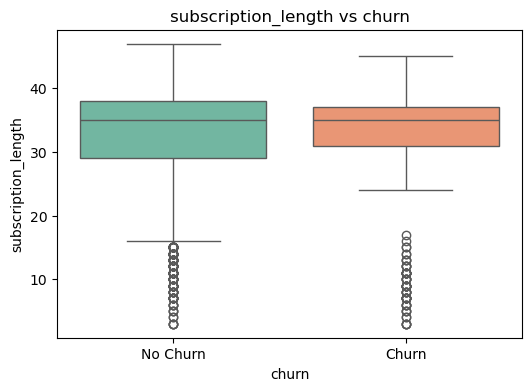

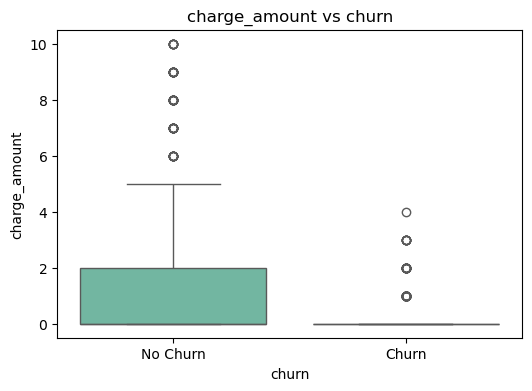

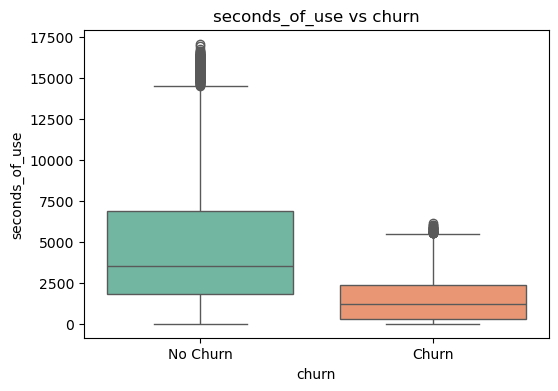

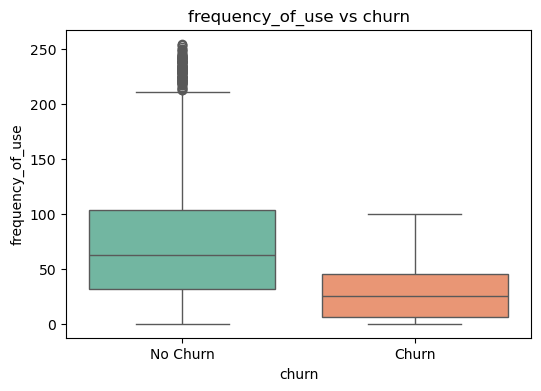

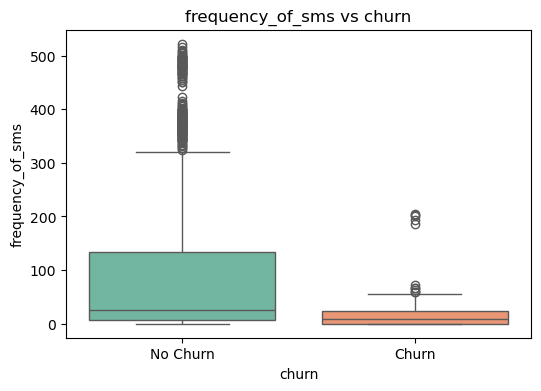

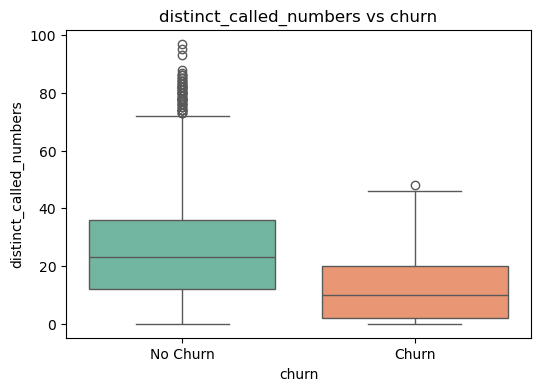

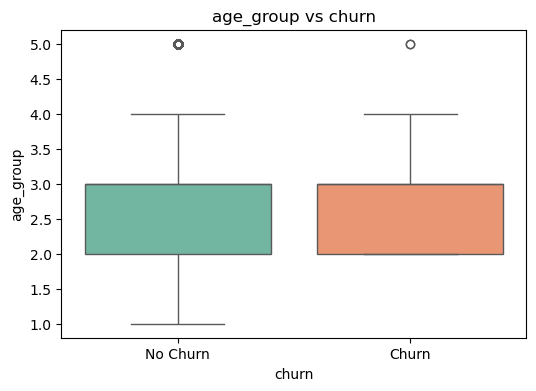

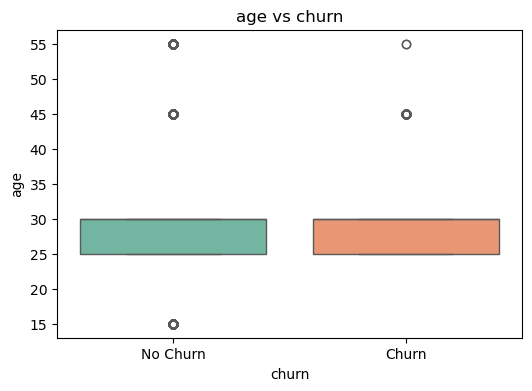

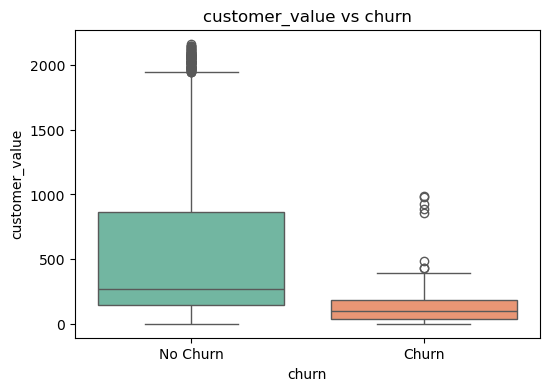

In [13]:
#Bivariate Analysis of columns vs churn

num_cols = df_eda.select_dtypes(include=['int64','float64']).columns
drop_cols =['customer_id', 'status', 'churn', 'complaints']
num_cols = [col for col in num_cols if col not in drop_cols]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', hue= 'churn', y= col, data= df_eda, palette='Set2', legend=False)
    plt.xticks([0,1],['No Churn','Churn'])
    plt.title(f"{col} vs churn")
    plt.show()

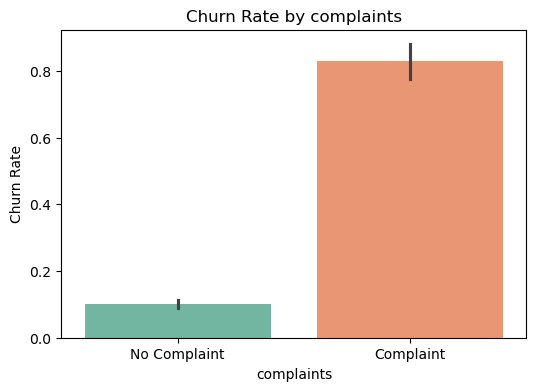

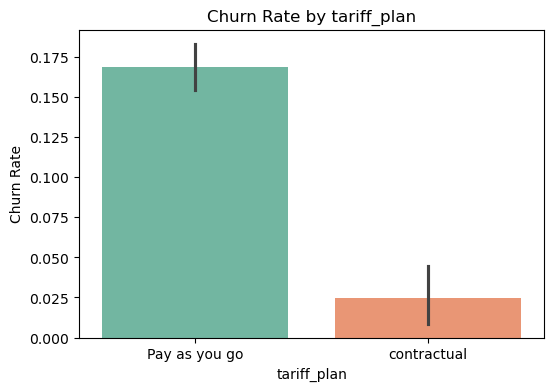

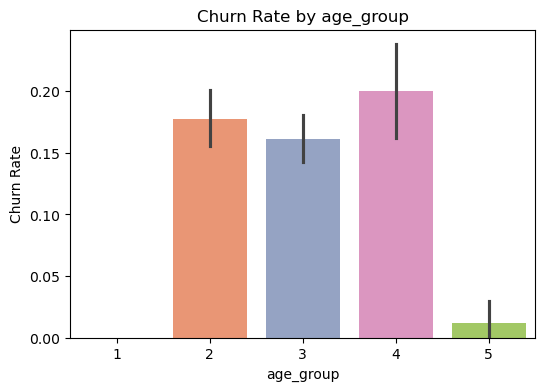

In [14]:
#Bivariate analysis for categorical columns
cat_cols = ['complaints', 'tariff_plan', 'age_group']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='churn', data=df_eda, hue=col, palette='Set2', legend=False)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    
    # Clean x-axis labels
    if col == 'complaints':
        plt.xticks([0,1], ['No Complaint','Complaint'])
    plt.show()

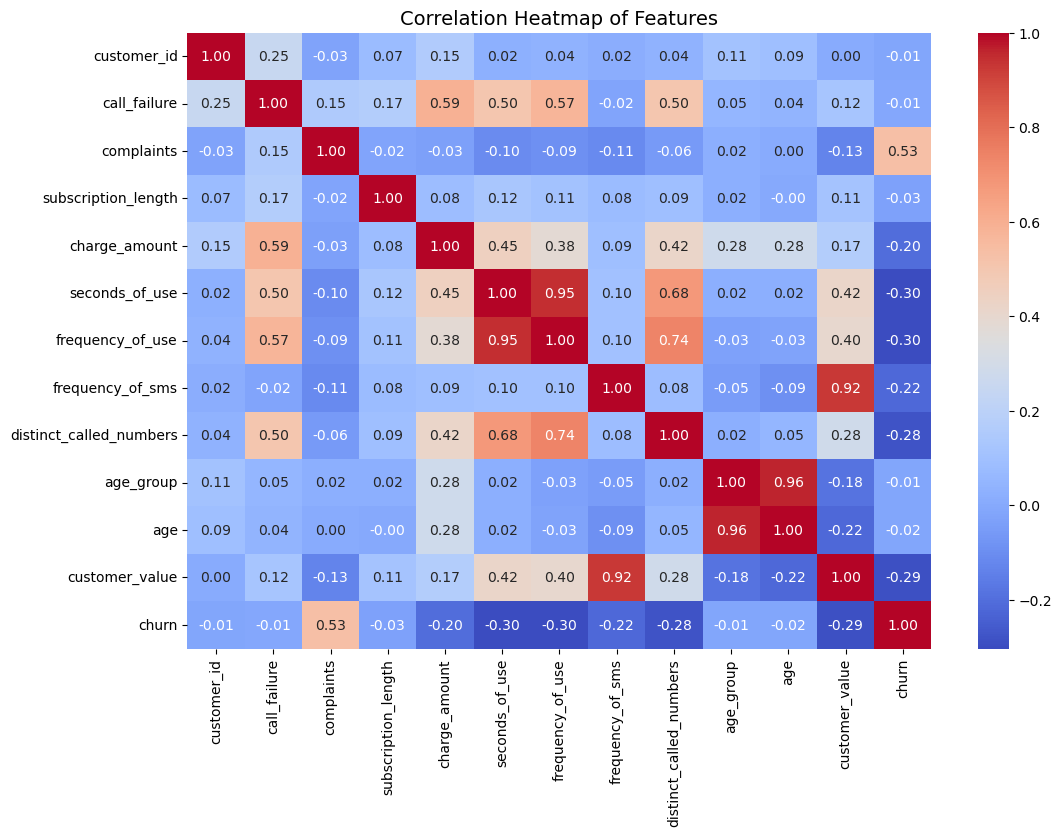

In [15]:
# Copy df to avoid changes
df_corr = df_eda.copy()

# Convert churn to numeric 
df_corr['churn'] = df_corr['churn'].astype(int)


# Drop categorical cols
df_corr = df_corr.drop(['tariff_plan', 'status'], axis=1, errors='ignore')

# Compute correlation
plt.figure(figsize=(12,8))
corr = df_corr.corr()

# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

In [17]:
df_eda.to_pickle('df_cleaned.pkl')

In [18]:
df_eda.to_csv('df_prep.csv')

### Final EDA Insights
- Churn rate is 15.7% → dataset is imbalanced.  
- Churners = lower engagement (less usage, fewer contacts, fewer SMS) + lower customer value.  
- Shorter subscription length increases churn.  
- Customers with complaints churn at a much higher rate.  
- Pay-as-you-go users churn more than contract users.  
- Age and call failures show weak patterns.  
- Hypothesis tests confirm complaints, tariff plan, and customer value are significant churn drivers.  